In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [68]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#890 observations and 11 columns
train.info()

#418 observations and 11 columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

**Exploratory Data Analysis**

After data loadings, we apply exploratory data analysis to check any missing data. Reading from the heat map below we can drop the Cabin column since there are a large number of data missing which is not able to replicate or replace by remains value.

For missing value in age, we can look at distribution on class, then look and the similarity on median and mean value to determine which value is the best fit for the replication.

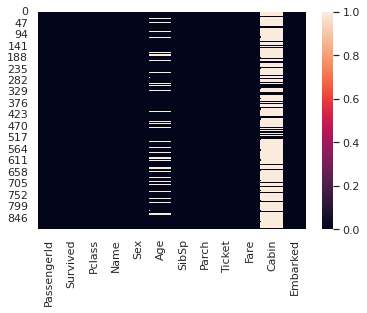

In [69]:
#Missing value checking
sns.heatmap(train.isnull())

We would like to see the age distribution by Class on train dataaset.

1.   Class 1 has the various range from 0-80 and the median value around 38.
2.   Class 2 and 3 have median below 30 and outliners. It tells that the missing data are came from this two class

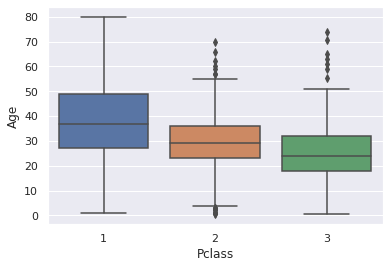

In [70]:
sns.boxplot(x="Pclass", y="Age", data=train)

Looking into the median and mean by class, the values are similar. Then we drill down one layer to see the distrbution by gender, the figuares are closer to median (since age is hard to measure by mean). Therefore apply transformation on age column by median value.

In [71]:
train.groupby("Pclass")['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [72]:
train.groupby("Pclass")['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [73]:
train.groupby(["Sex","Pclass"])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [74]:
train['Age'] = train['Age'].fillna(train.groupby(["Sex","Pclass"])['Age'].transform('median'))

After imputation, we check the heatmap again to ensure there is no other missing before move on.

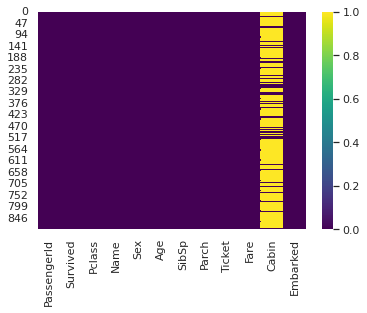

In [75]:
sns.heatmap(train.isnull(),cmap='viridis')

**Cleansing - Cabin Column**

In [76]:
train.drop('Cabin',axis=1,inplace=True)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**Transformation - Sex and Embarked Columnes**

We would like to perform data transformation on sex and embarked by one hot encoding.

In [78]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [79]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


After the preparation work, we keep the columns we needed and merge with the one coded column.

* Ticket, passengerID and Name are not used in the model
* Sex / Embarked are replaced by one hot

In [80]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**Build a logistic regression model**

Split the data
- X_Train takes all the predictors
- Y_Train only contain Surive

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=101)

In [93]:
from sklearn.linear_model import LogisticRegression
l2model = LogisticRegression(C=0.001, penalty="l2", random_state = 40)
l2model.fit(X_train,Y_train) 

LogisticRegression(C=0.001, random_state=40)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


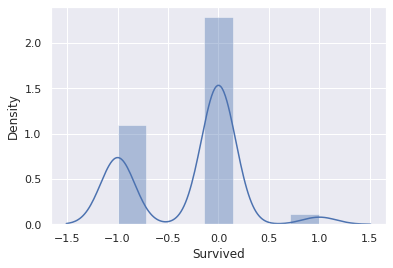

In [94]:
Ypred = l2model.predict(X_test)

#prediction from model 
sns.distplot(Ypred-Y_test)

In [95]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#calculate the accuracy score
kfold_Para = range(2,6) 

# For loop to loop from 2 - 5
for i in kfold_Para:
  Acc=cross_val_score(l2model, 
                      X_train, Y_train, 
                      scoring='accuracy', 
                      cv=KFold(n_splits=i, shuffle=True, random_state=20))
  print('Accuracy_with_kfold=',i, ':' ,{round(np.sum(Acc)/i, 4)})

Accuracy_with_kfold= 2 : {0.6677}
Accuracy_with_kfold= 3 : {0.6838}
Accuracy_with_kfold= 4 : {0.679}
Accuracy_with_kfold= 5 : {0.6805}
